MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

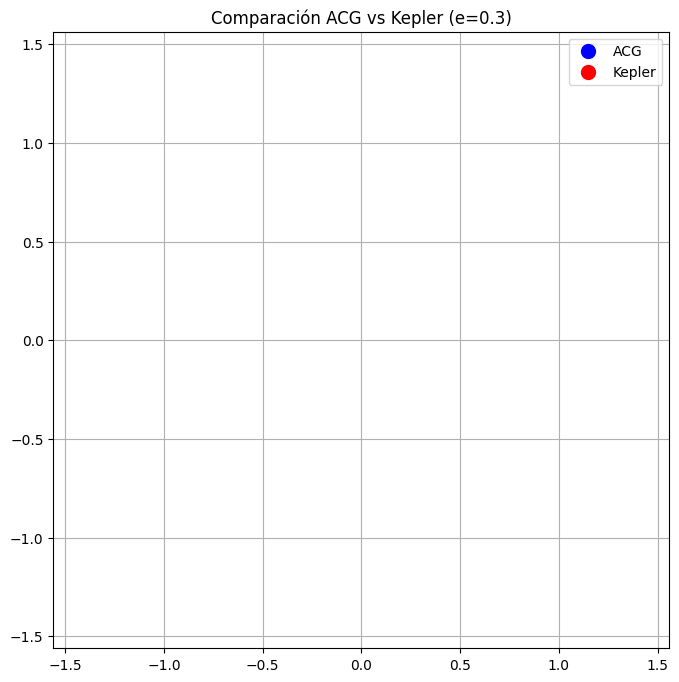

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class OrbitAnimation:
    def __init__(self, a=1.0, e=0.1):
        self.a = a  # semieje mayor
        self.e = e  # excentricidad
        self.n = 2*np.pi  # movimiento medio (una vuelta por unidad de tiempo)
        
        # Configuración de la figura
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.ax.set_aspect('equal')
        self.ax.grid(True)
        
        # Límites del plot
        lim = self.a*(1 + self.e)
        self.ax.set_xlim(-lim*1.2, lim*1.2)
        self.ax.set_ylim(-lim*1.2, lim*1.2)
        
        # Tiempo
        self.t = np.linspace(0, 2*np.pi/self.n, 200)
        
        # Inicializar líneas y puntos
        self.point_ACG, = self.ax.plot([], [], 'bo', label='ACG', markersize=10)
        self.point_Kepler, = self.ax.plot([], [], 'ro', label='Kepler', markersize=10)
        self.orbit_ACG, = self.ax.plot([], [], 'b-', alpha=0.3)
        self.orbit_Kepler, = self.ax.plot([], [], 'r-', alpha=0.3)
        
        # Título y leyenda
        self.ax.set_title(f'Comparación ACG vs Kepler (e={self.e})')
        self.ax.legend()

    def kepler_E(self, M, tolerance=1e-8):
        """Resuelve la ecuación de Kepler"""
        E = M
        while True:
            delta = (E - self.e*np.sin(E) - M)/(1 - self.e*np.cos(E))
            E = E - delta
            if abs(delta) < tolerance:
                break
        return E

    def position_ACG(self, t):
        """Calcula posición usando ACG"""
        x = self.a*(np.cos(self.n*t) - self.e)
        y = self.a*np.sin(self.n*t)
        return x, y

    def position_Kepler(self, t):
        """Calcula posición usando solución de Kepler"""
        M = self.n*t
        E = self.kepler_E(M)
        x = self.a*(np.cos(E) - self.e)
        y = self.a*np.sqrt(1-self.e**2)*np.sin(E)
        return x, y

    def init(self):
        """Inicialización de la animación"""
        self.point_ACG.set_data([], [])
        self.point_Kepler.set_data([], [])
        self.orbit_ACG.set_data([], [])
        self.orbit_Kepler.set_data([], [])
        return self.point_ACG, self.point_Kepler, self.orbit_ACG, self.orbit_Kepler

    def animate(self, i):
        """Función de animación"""
        # Calcular posiciones hasta el frame actual
        x_ACG, y_ACG = self.position_ACG(self.t[:i+1])
        x_Kepler, y_Kepler = self.position_Kepler(self.t[:i+1])
        
        # Actualizar posiciones de los puntos
        self.point_ACG.set_data(x_ACG[-1], y_ACG[-1])
        self.point_Kepler.set_data(x_Kepler[-1], y_Kepler[-1])
        
        # Actualizar trayectorias
        self.orbit_ACG.set_data(x_ACG, y_ACG)
        self.orbit_Kepler.set_data(x_Kepler, y_Kepler)
        
        return self.point_ACG, self.point_Kepler, self.orbit_ACG, self.orbit_Kepler

    def create_animation(self):
        """Crea y retorna la animación"""
        anim = FuncAnimation(self.fig, self.animate, 
                           init_func=self.init,
                           frames=len(self.t), 
                           interval=20,
                           blit=True)
        return anim

# Crear y mostrar la animación
orbit_anim = OrbitAnimation(a=1.0, e=0.3)  # Puedes ajustar 'a' y 'e' aquí
anim = orbit_anim.create_animation()
anim.save('orbit_animation.gif', writer='imagemagick', fps=30)